## What
This notebook is a quick research project I perfomed to test the efficacy of knowledge distilattion for "tiny" models. The model was close to the GPT-2 model in many parameters with some modern techniques added.  - thing 1
- thing 2
- thing 3
- etc.

This notebook is a research project that I conducted to test the efficacy of the results of (Yuxian Gu et. al) in their 2024 MiniLLM paper with what I will call "MicoLMs" (models with less than 200B parameters).

I first trained an entire 124M with inspiration taken from Andrej Karpathy and GPT-2 as well as Olmo. With this I created a modular LM trained on the 10B token subset of finewebEDU from Hugging Face. As you will see down below. the model outperformed GPT-2 124M on the hellaswag eval with far fewer training tokens. I then took that pretrained model and created a training framework for the MiniLLM implementation of reverse KLD loss with a teacher model to try to get the Olmo 1B model to transfer some of its intelligence down to the MicroLM.

To keep variables to a minimum, the only difference between the pretraining and the rKLD was the implemtation of the KLD itself. No architectural changes were made to the model. 

Both models we will evaluated during and after training on zero-shot and few-shot hellaswag, snli, and GLUE benchmarks to evaluate perfomance. Comparing the loss in this scenario is not relevant as the loss calculations are completely different.

## Hella Swag Eval

Olmo 1B scored 0.6071 accuracy_norm on the hella swag eval  
Olmo 7B scored 0.7338   
gpt-2 124M acc_norm: 0.2955     
gpt-2 1.5B acc_norm: 0.4893     

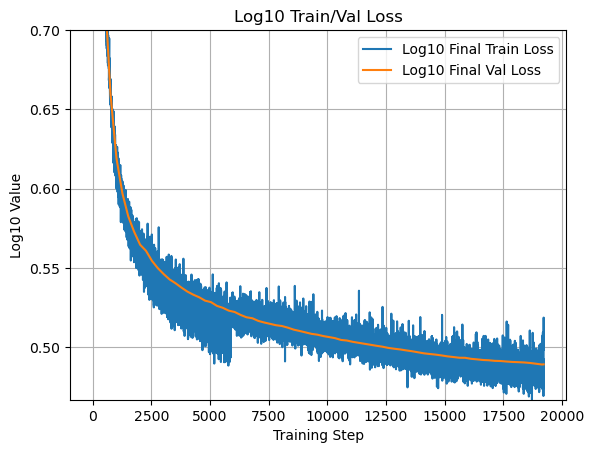

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path_final = "logs/SLM-0.124B_final_control_model_log.txt"
file_path_first = "logs/SLM-0.124B_log.txt"
data_final = pd.read_csv(file_path_final, sep=" ", header=None, names=["index", "label", "value"])
# data_first = pd.read_csv(file_path_first, sep=" ", header=None, names=["index", "label", "value"])
data_kd = pd.read_csv("logs/SLM-0.124B_MiniLLM_KLD_log.txt", sep=" ", header=None, names=["index", "label", "value"])

train_data_final = data_final[data_final["label"] == "train"]
val_data_final = data_final[data_final["label"] == "val"]
hella_data_final = data_final[data_final["label"] == "hella"]
# train_data_first = data_first[data_first["label"] == "train"]
# val_data_first = data_first[data_first["label"] == "val"]
# hella_data_first = data_first[data_first["label"] == "hella"]
train_data_kd = data_kd[data_kd["label"] == "train"]
val_data_kd = data_kd[data_kd["label"] == "val"]
hella_data_dk = data_kd[data_kd["label"] == "hella"]

plt.plot(np.log10(train_data_final["value"]), label="Log10 Final Train Loss")
plt.plot(np.log10(val_data_final["value"]), label="Log10 Final Val Loss")

# plt.plot(np.log10(train_data_first["value"]), label="Log10 First Train Loss")
# plt.plot(np.log10(val_data_first["value"]), label="Log10 First Val Loss")

plt.xlabel('Training Step')
plt.ylabel('Log10 Value')
plt.title('Log10 Train/Val Loss')
plt.ylim(min(np.log10(train_data_final["value"])), 0.7)
plt.legend()
plt.grid(True)

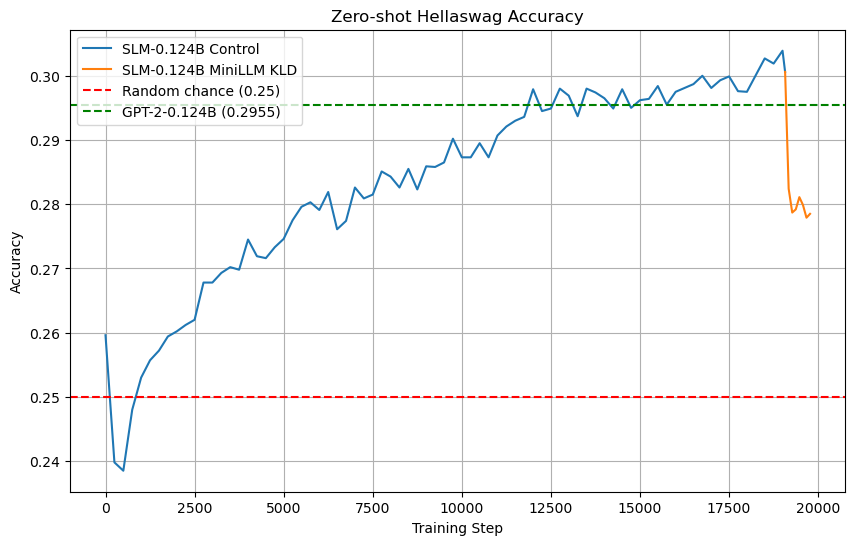

In [28]:
plt.figure(figsize=(10, 6))

hella_data_dk
hella_data_final

hella_dk_idx = hella_data_dk["index"] + max(hella_data_final["index"])

plt.plot(hella_data_final["index"], hella_data_final["value"], label="SLM-0.124B Control")
# plt.plot(hella_data_first["value"], label="SLM-0.124B First")
plt.plot(hella_dk_idx, hella_data_dk["value"], label="SLM-0.124B MiniLLM KLD")
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Zero-shot Hellaswag Accuracy')

# Add a dotted line at y = 0.25 for random chance accuracy
plt.axhline(y=0.25, color='red', linestyle='--', label='Random chance (0.25)')
plt.axhline(y=0.2955, color='green', linestyle='--', label='GPT-2-0.124B (0.2955)')

plt.legend()
plt.grid(True)

Notablly SLM-0.124B trained 

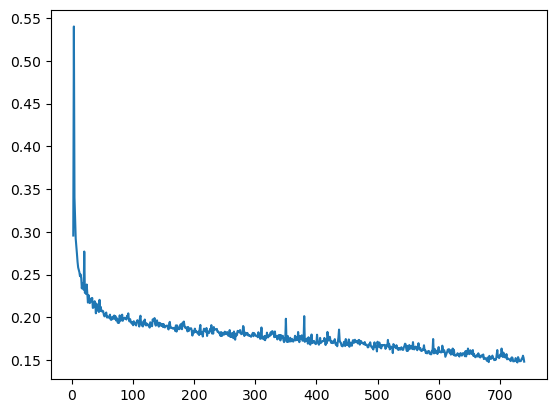

In [29]:
plt.plot(train_data_kd["value"])
plt.show()

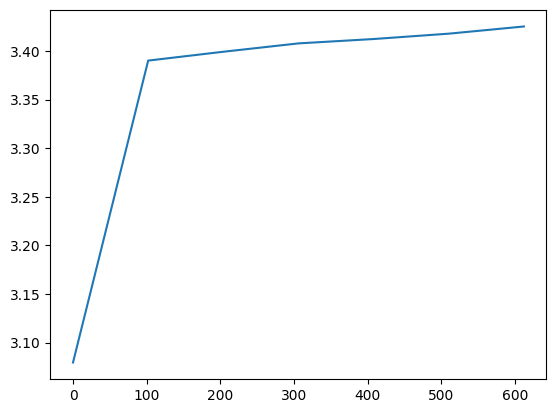

In [7]:
plt.plot(val_data_kd["value"])
plt.show()